In [59]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input,Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [60]:
# Load the data
import tensorflow as tf
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0
print("x_train.shape:", x_train.shape)

x_train.shape: (60000, 28, 28)


In [61]:
#The data is 2D
#Convolution expectheigh* width*color
x_train = np.expand_dims(x_train,-1)
x_test = np.expand_dims(x_test,-1)
print(x_train.shape)

(60000, 28, 28, 1)


In [62]:
#No. of classes
K = len(set(y_train))
print("No. of classes:", K)

No. of classes: 10


In [63]:
#Build the model using functional API
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3,3), strides = 2, activation='relu')(i)
x = Conv2D(64, (3,3), strides = 2, activation ='relu')(x)
x = Conv2D(128, (3,3), strides = 2, activation ='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation = 'softmax')(x)

model = Model(i,x)



In [64]:
#Compile the model
model.compile(optimizer='adam',loss ='sparse_categorical_crossentropy',metrics=['accuracy'])

In [65]:
#Train the model
r = model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs = 15)

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 13s 218us/sample - loss: 0.5257 - accuracy: 0.8048 - val_loss: 0.4063 - val_accuracy: 0.8453
Epoch 2/15
60000/60000 [==============================] - 12s 205us/sample - loss: 0.3643 - accuracy: 0.8619 - val_loss: 0.3444 - val_accuracy: 0.8719
Epoch 3/15
60000/60000 [==============================] - 12s 206us/sample - loss: 0.3121 - accuracy: 0.8816 - val_loss: 0.3324 - val_accuracy: 0.8778
Epoch 4/15
60000/60000 [==============================] - 12s 205us/sample - loss: 0.2803 - accuracy: 0.8932 - val_loss: 0.3063 - val_accuracy: 0.8864
Epoch 5/15
60000/60000 [==============================] - 13s 212us/sample - loss: 0.2554 - accuracy: 0.9031 - val_loss: 0.3043 - val_accuracy: 0.8894
Epoch 6/15
60000/60000 [==============================] - 13s 215us/sample - loss: 0.2332 - accuracy: 0.9118 - val_loss: 0.3034 - val_accuracy: 0.8921
Epoch 7/15
60000/60000 [====================

<function matplotlib.pyplot.legend(*args, **kwargs)>

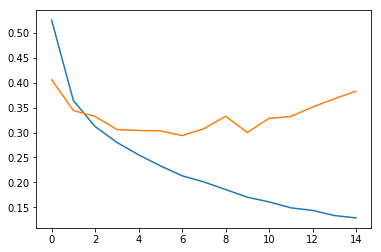

In [66]:
#Plot loss per iteration
import matplotlib.pyplot as pt
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
pt.legend

<function matplotlib.pyplot.legend(*args, **kwargs)>

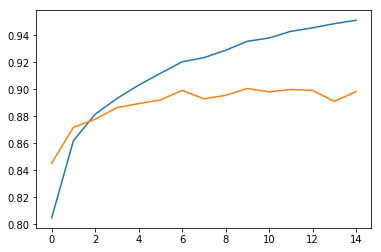

In [67]:
#Plot accuracy per iteration
plt.plot(r.history['accuracy'], label = 'acc')
plt.plot(r.history['val_accuracy'], label = 'val_acc')
plt.legend

Confusion matrix, without normalization
[[866   1  28  22   4   1  69   0   9   0]
 [  6 970   1  13   3   0   6   0   1   0]
 [ 18   0 852  13  58   0  59   0   0   0]
 [ 21   2  18 906  27   0  24   1   0   1]
 [  3   0  56  29 845   0  67   0   0   0]
 [  1   0   0   0   0 971   0  19   0   9]
 [123   0  71  28  95   0 676   0   7   0]
 [  0   0   0   0   0  14   0 966   1  19]
 [  2   0   5   1  13   2   6   2 967   2]
 [  0   0   0   0   0   7   1  28   0 964]]


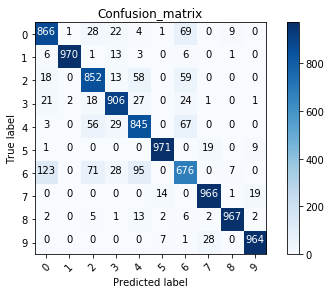

In [68]:
#Plot Confusion_Matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, 
                          normalize=False, 
                          title='Confusion_matrix', 
                          cmap=plt.cm.Blues):
    
    """
    This function prints and plots confusion matrix.
    Normalization can be applied by setting 'normalize=True'
    
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, without normalization")
        
    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i, format(cm[i,j], fmt),
                 horizontalalignment = "center",
                 color = "white" if cm[i,j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    
p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm,list(range(10)))
            
    

In [71]:
# Label Mapping
labels = '''T-shirt/top
Trouser
Pulover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle_boot'''.split()

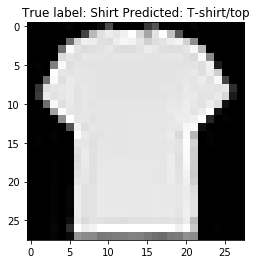

In [72]:
#Some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28),cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]],labels[p_test[i]]));